In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
credit_data = pd.read_csv('../data/credit-data.csv')

# Info sorted by data types
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               202 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         43 non-null     object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [7]:
print(f"{credit_data['Credit-Application-Result'].value_counts()}")

Credit-Application-Result
Creditworthy        358
Non-Creditworthy    142
Name: count, dtype: int64


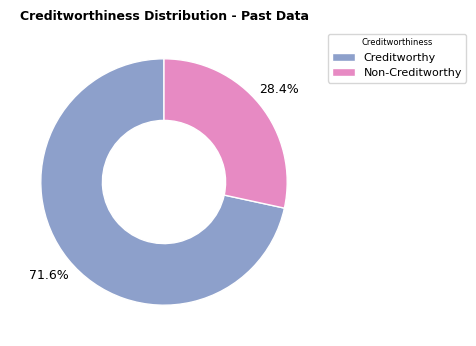

In [8]:
# 2. Plot a donut chart of Credit Application Result Distribution
credit_result_counts = credit_data['Credit-Application-Result'].value_counts()
plt.figure(figsize=(4, 4))

# Create a pie chart with percentage labels inside the chart
wedges, texts, autotexts = plt.pie(
    credit_result_counts,
    labels=credit_result_counts.index,  # Add category labels
    autopct='%1.1f%%',  # Add percentage labels
    startangle=90,
    colors=['#8da0cb', '#e78ac3'],  # Example color palette
    wedgeprops={'width': 0.5, 'edgecolor': 'w'},  # Adjust hole size
    pctdistance=1.2,  # Move percentage labels closer to the center
    labeldistance=1.1,  # Keep category labels outside the chart
    textprops={'fontsize': 9, 'fontweight': 'regular'}  # Adjust font size
)

# Suppress labels
for text in texts:
    text.set_visible(False)

# Add a legend instead of labels
plt.legend(
    credit_result_counts.index,
    title="Creditworthiness",
    loc="best",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Place the legend outside the chart
    fontsize=8,  # Adjust legend font size to 8
    title_fontsize=6  # Reduce font size of the legend title
)

plt.title('Creditworthiness Distribution - Past Data', fontsize=9, fontweight='bold')  # Adjust title font size to 9
plt.show()

In [9]:
counter = 1
for col in credit_data.columns:
    print(f"\n******* {counter} *******")
    counter += 1
    if credit_data[col].dtype == 'object':
        print(f"{credit_data[col].value_counts()}\n")
        print(f"Unique values: {credit_data[col].nunique()}")
        print(f"Missing values: {credit_data[col].isnull().sum()}")
    else:
        print(f"Column: {col}")
        print(f"{credit_data[col].describe()}")
        print(f"\nData type: {credit_data[col].dtype}")
        print(f"Unique values: {credit_data[col].nunique()}")
        print(f"Missing values: {credit_data[col].isnull().sum()}")


******* 1 *******
Credit-Application-Result
Creditworthy        358
Non-Creditworthy    142
Name: count, dtype: int64

Unique values: 2
Missing values: 0

******* 2 *******
Account-Balance
No Account      262
Some Balance    238
Name: count, dtype: int64

Unique values: 2
Missing values: 0

******* 3 *******
Column: Duration-of-Credit-Month
count    500.00000
mean      21.43400
std       12.30742
min        4.00000
25%       12.00000
50%       18.00000
75%       24.00000
max       60.00000
Name: Duration-of-Credit-Month, dtype: float64

Data type: int64
Unique values: 30
Missing values: 0

******* 4 *******
Payment-Status-of-Previous-Credit
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: count, dtype: int64

Unique values: 3
Missing values: 0

******* 5 *******
Purpose
Home Related    355
Used car         83
New car          47
Other            15
Name: count, dtype: int64

Unique values: 4
Missing values: 0

******* 6 ******

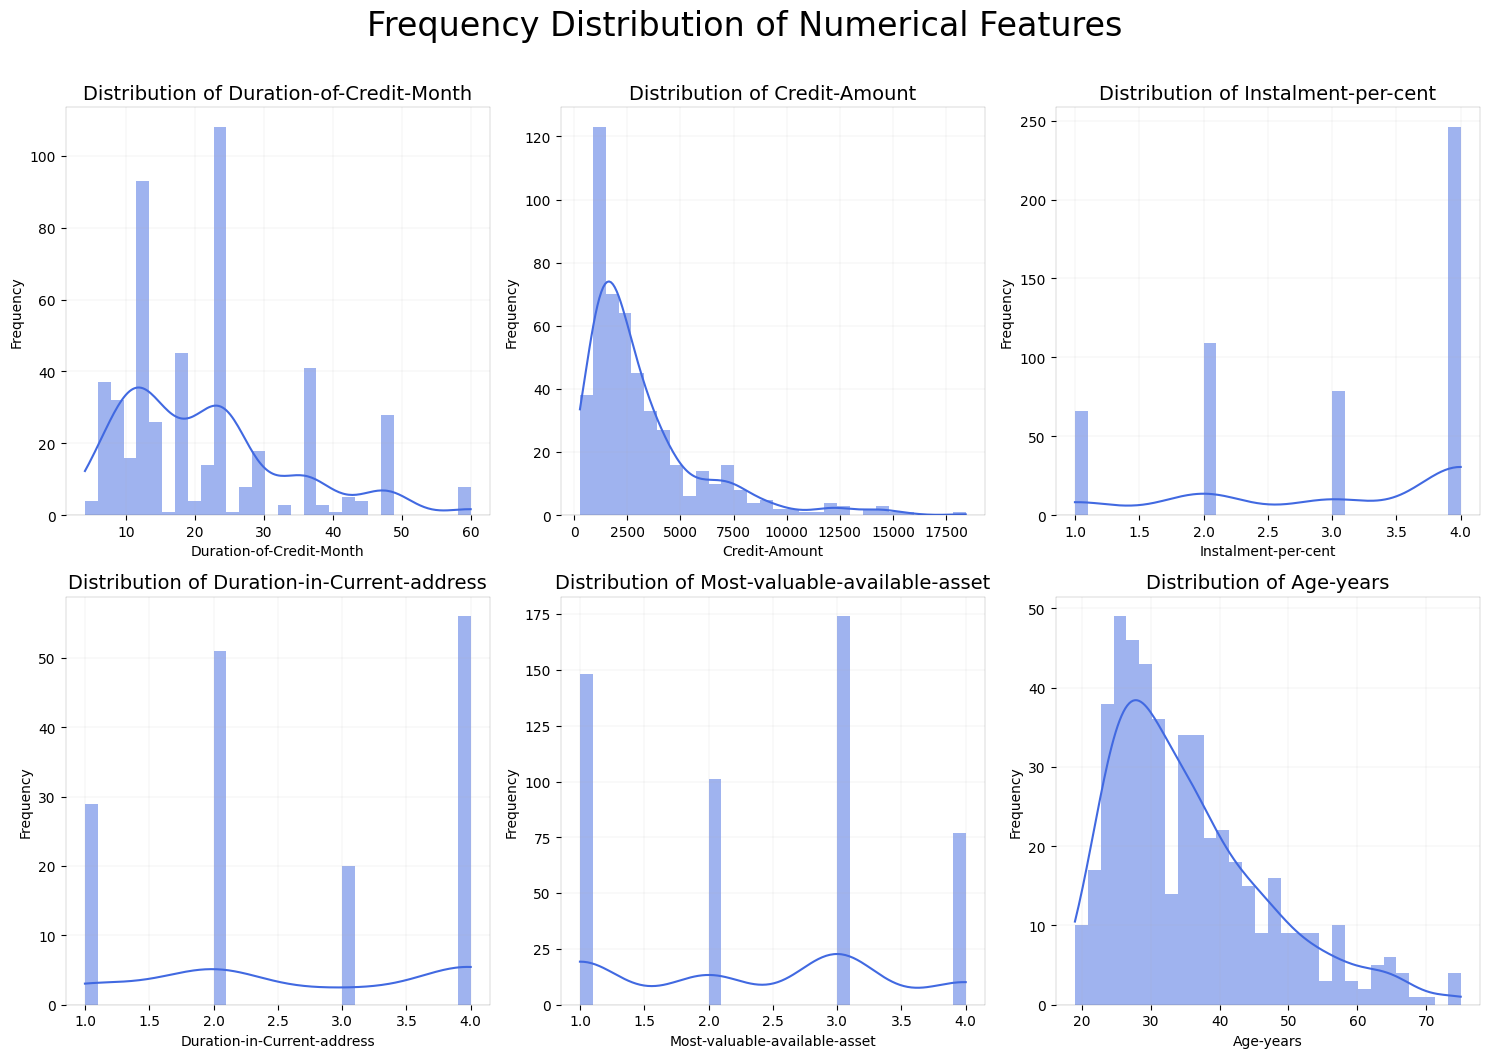

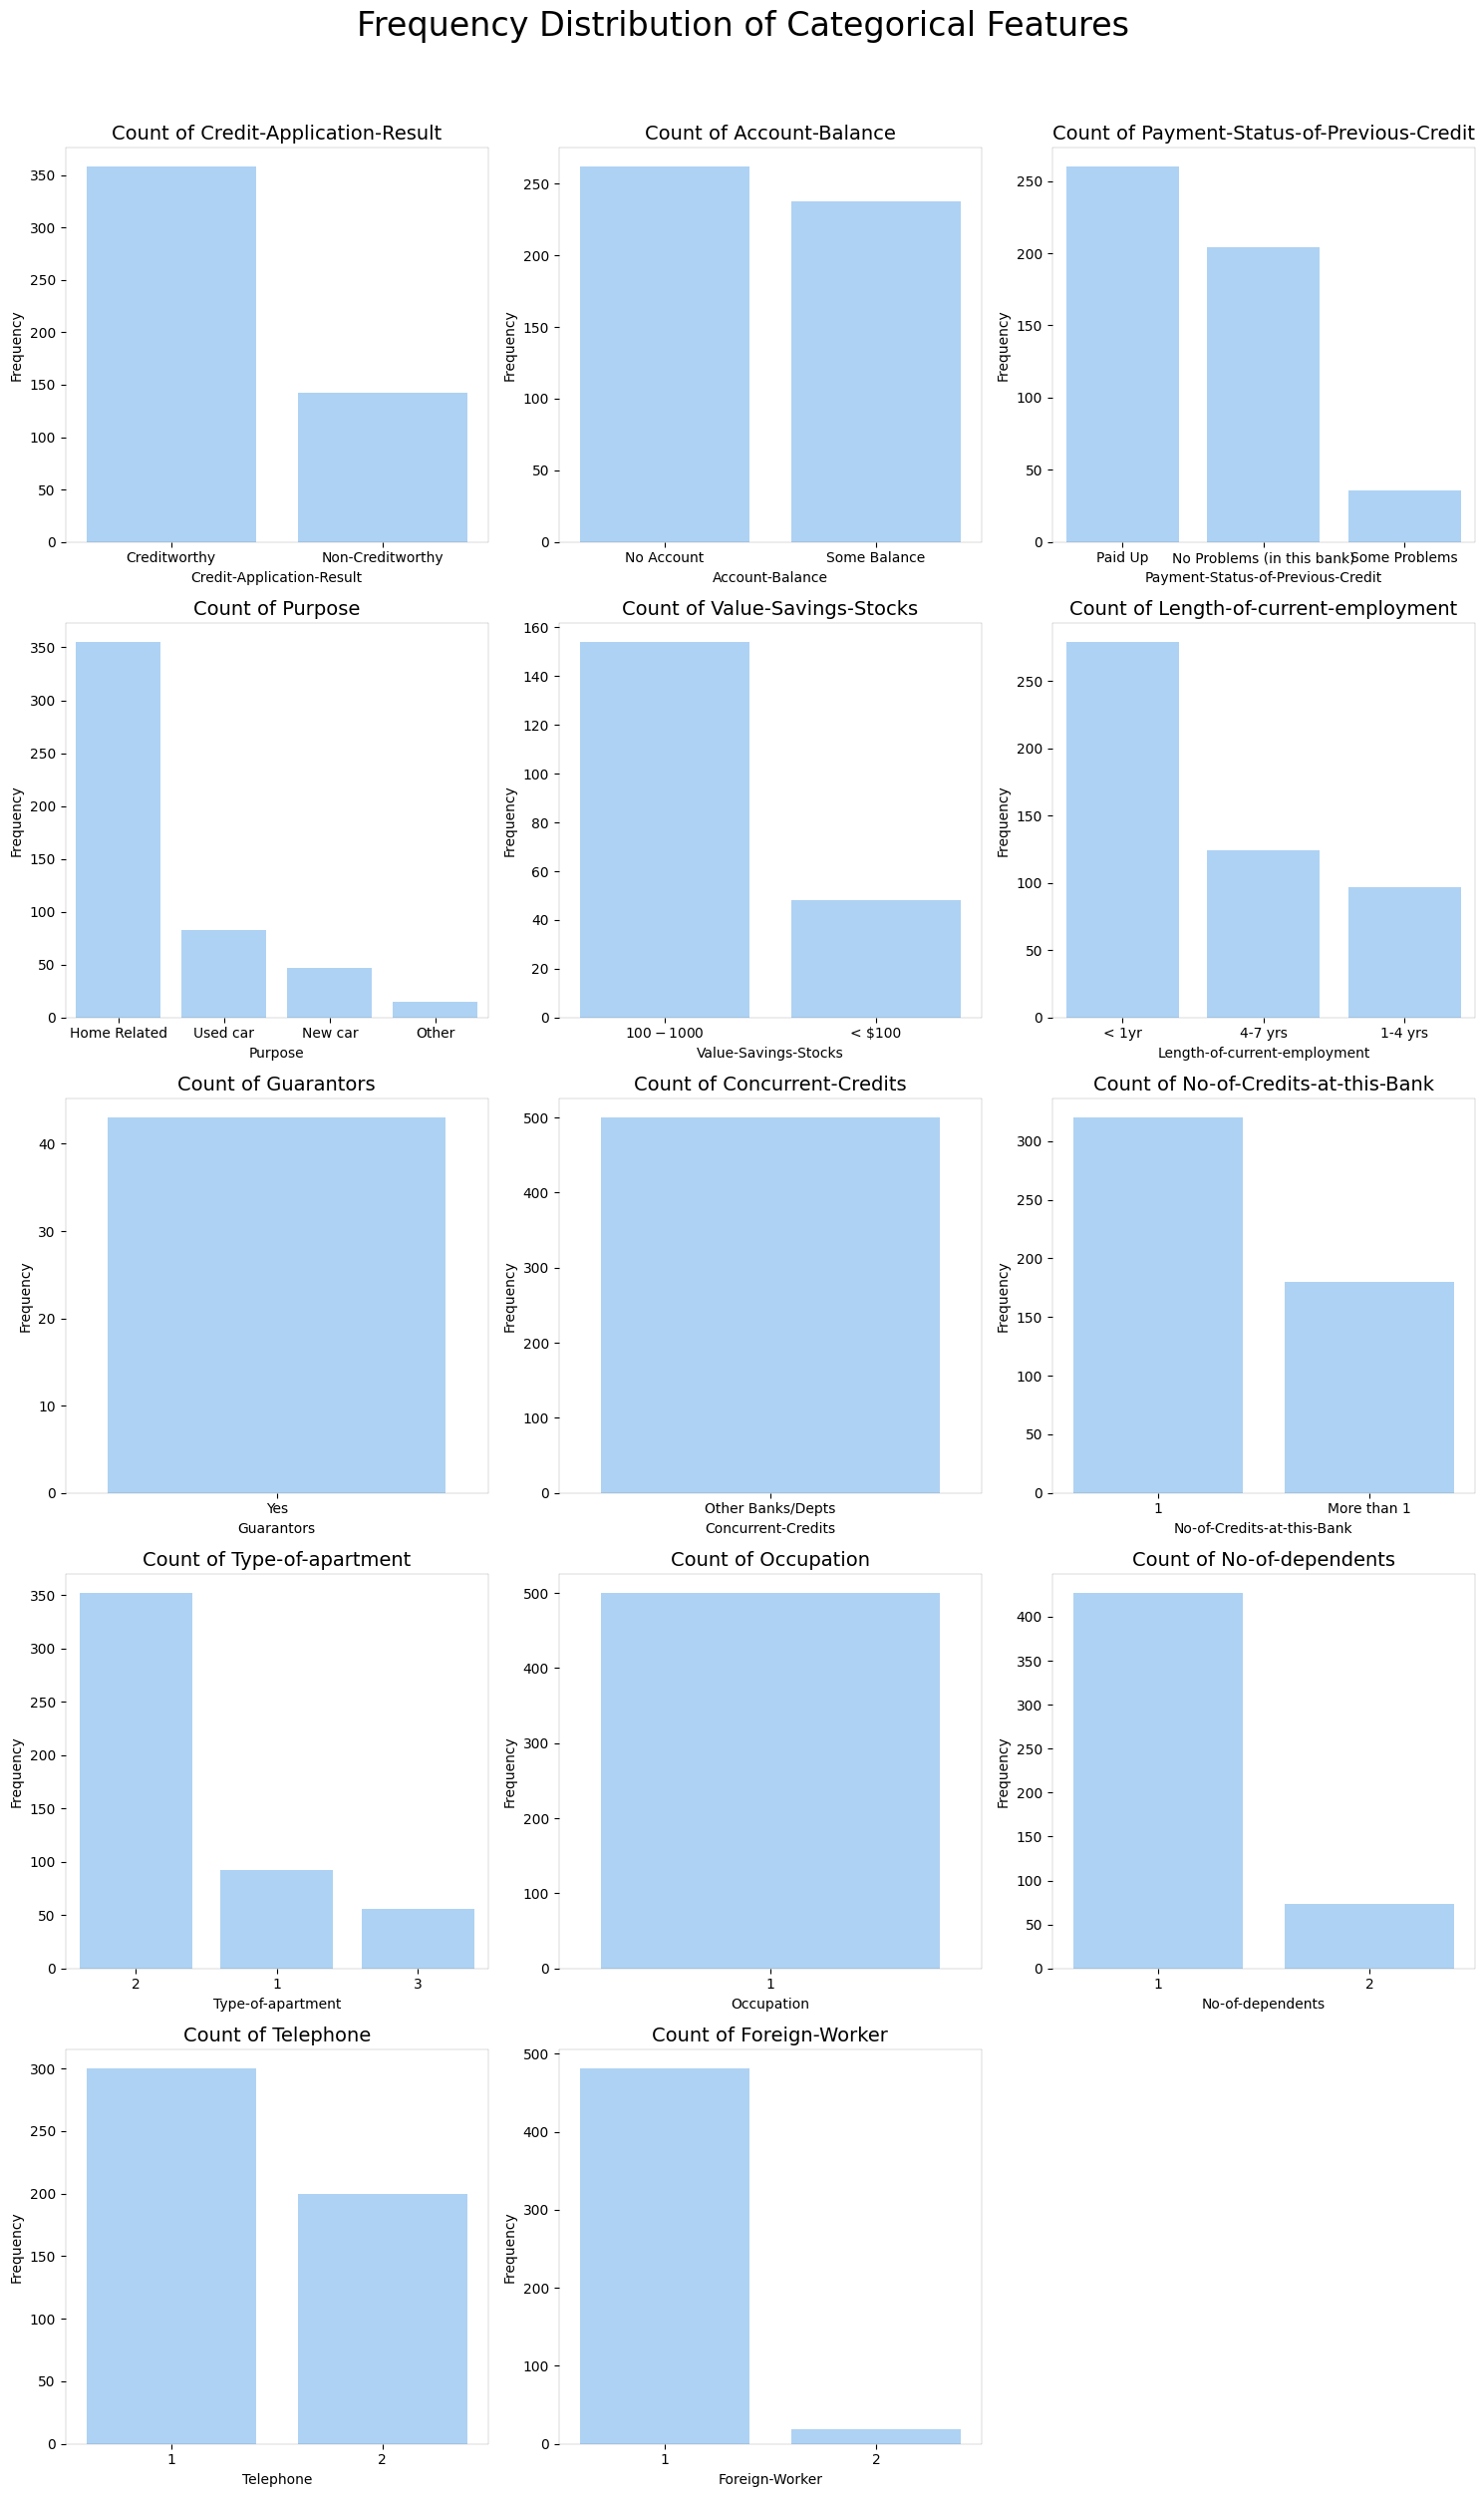

Categorical features: Index(['Credit-Application-Result', 'Account-Balance',
       'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Guarantors', 'Concurrent-Credits',
       'No-of-Credits-at-this-Bank', 'Type-of-apartment', 'Occupation',
       'No-of-dependents', 'Telephone', 'Foreign-Worker'],
      dtype='object')
Float features: Index(['Duration-in-Current-address', 'Age-years'], dtype='object')
Int features: Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Type-of-apartment', 'Occupation',
       'No-of-dependents', 'Telephone', 'Foreign-Worker'],
      dtype='object')


In [10]:
# Create subplots to view frequency distribution of each column in a grid layout

# Numeric columns
numeric_cols = credit_data.select_dtypes(include=[np.number]).columns

# Separate float and int columns
float_cols = credit_data.select_dtypes(include=['float']).columns
int_cols = credit_data.select_dtypes(include=['int']).columns

# Categorical columns
categorical_cols = credit_data.select_dtypes(include=[object]).columns

# Remove specific columns from numeric_cols
categorical_savedas_numerical = ['Type-of-apartment', 'Occupation', 'No-of-dependents', 'Telephone', 'Foreign-Worker']
numeric_cols = numeric_cols.drop(categorical_savedas_numerical)
categorical_cols = categorical_cols.append(pd.Index(categorical_savedas_numerical))

fig, axes = plt.subplots(nrows=len(numeric_cols)//3 + 1, ncols=3, figsize=(15, 5 * (len(numeric_cols)//3 + 1)))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.histplot(credit_data[col], bins=30, kde=True, ax=ax, color='royalblue', edgecolor=None)  # Remove borders
    ax.set_title(f'Distribution of {col}', fontsize=14)

    ax.set_ylabel('Frequency')
    ax.grid(linewidth=0.1)
    for spine in ax.spines.values():
        spine.set_linewidth(0.1)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Frequency Distribution of Numerical Features', fontsize=24, y=1, fontweight='regular')
plt.show()

# Plot categorical columns
fig, axes = plt.subplots(nrows=len(categorical_cols)//3 + 1, ncols=3, figsize=(15, 5 * (len(categorical_cols)//3 + 1)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    order = credit_data[col].value_counts().index
    sns.countplot(data=credit_data, x=col, ax=ax, order=order, color='#a2d2ff', edgecolor=None)  # Remove borders
    ax.set_title(f'Count of {col}', fontsize=14)
    ax.tick_params(axis='x', rotation=0)
    
    ax.set_ylabel('Frequency')
    for spine in ax.spines.values():
        spine.set_linewidth(0.1)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Frequency Distribution of Categorical Features', fontsize=24, y=1, fontweight='regular')
plt.show()

print(f"Categorical features: {categorical_cols}")
print(f"Float features: {float_cols}")
print(f"Int features: {int_cols}")

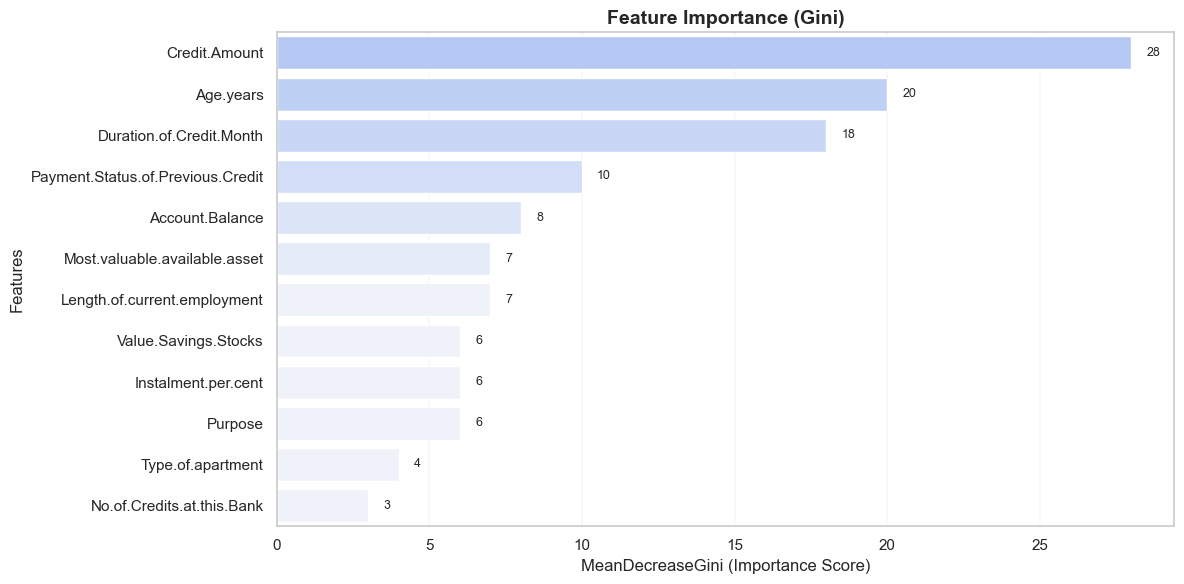

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame
importance_df = pd.DataFrame({
    'Feature': [
        'Credit.Amount', 'Age.years', 'Duration.of.Credit.Month',
        'Payment.Status.of.Previous.Credit', 'Account.Balance',
        'Most.valuable.available.asset', 'Length.of.current.employment',
        'Value.Savings.Stocks', 'Instalment.per.cent', 'Purpose',
        'Type.of.apartment', 'No.of.Credits.at.this.Bank'
    ],
    'Importance': [
        28, 20, 18, 10, 8, 7, 7, 6, 6, 6, 4, 3
    ]
})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set the Seaborn theme for consistency, but also specify gridline style
sns.set_theme(style="whitegrid")  # 'whitegrid' already adds gridlines, but you can customize more.

# Customize gridlines using Matplotlib
plt.figure(figsize=(12, 6))

# Define a custom color palette
custom_palette = [
    '#abc4ff', '#b6ccfe', '#c1d3fe', 
    '#ccdbfd', '#d7e3fc', '#e2eafc', '#edf2fb', '#edf2fb', 
    '#edf2fb', '#edf2fb', '#edf2fb', '#edf2fb'
]

# Create the horizontal bar plot
ax = sns.barplot(
    data=importance_df,
    y='Feature',
    x='Importance',
    hue='Feature',
    palette=custom_palette
)

# Add text labels for the values on each bar for clarity
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_width() + 0.5,  # Position x: slightly after the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Position y: vertically centered on the bar
        f'{importance_df["Importance"].iloc[i]}',  # Text: the importance score
        va='center',  # Vertical alignment
        ha='left',    # Horizontal alignment
        fontsize=9    # Font size
    )

# Customize gridlines further:
ax.grid(True)  # Turn on the gridlines (if they aren't on by default)
ax.grid(which='both', axis='x', linestyle='--', linewidth=0.1, color='gray')  # Customize gridlines on x-axis
ax.grid(which='both', axis='y', linestyle='-', linewidth=0, color='lightgray')  # Customize gridlines on y-axis

# Set the labels for the axes and the title for the plot
ax.set_xlabel('MeanDecreaseGini (Importance Score)', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.set_title('Feature Importance (Gini)', fontsize=14, fontweight='bold')

# Adjust layout to prevent labels from overlapping or being cut off
plt.tight_layout()
plt.show()
